In [28]:
import re
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [29]:
# Conexão
def get_connection():
    return psycopg2.connect(
        dbname="PROCESSOS",
        user="",
        password="",
        host="",
        port="5432"
    )

## Histograma da quantidade de processos por quantidade de tokens, com 100 colunas 

C:\Users\Loreane\AppData\Local\Temp\ipykernel_19216\1653968042.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query("SELECT qtd_tokens_ementa FROM processos WHERE qtd_tokens_ementa IS NOT NULL", conn)


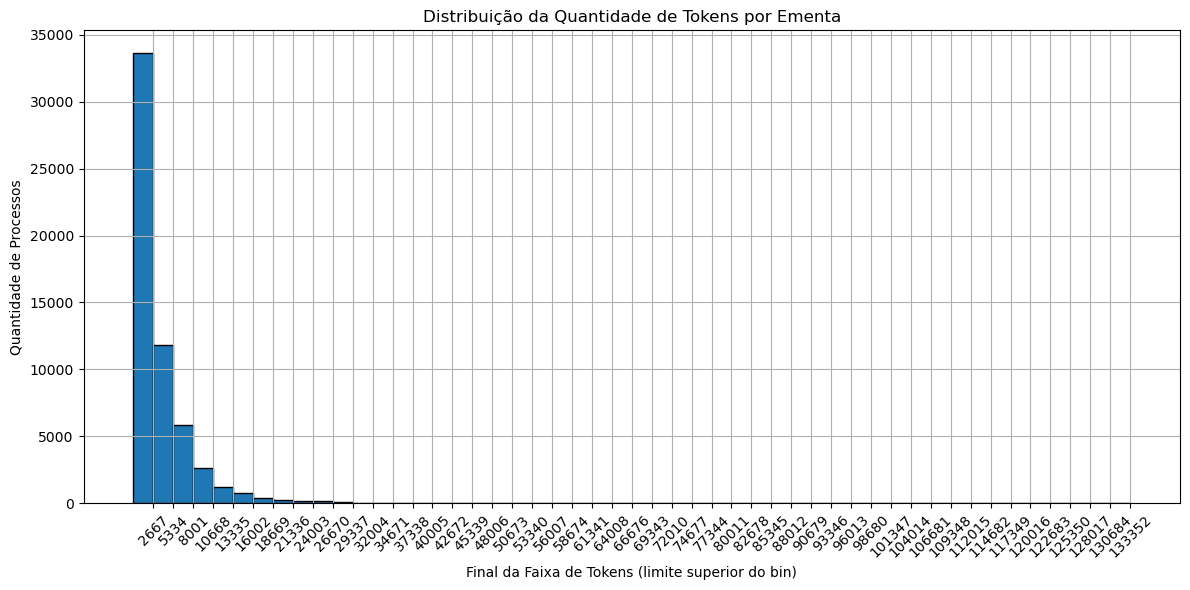

In [30]:

# Conectar e carregar os dados
conn = get_connection()
df = pd.read_sql_query("SELECT qtd_tokens_ementa FROM processos WHERE qtd_tokens_ementa IS NOT NULL", conn)
conn.close()

# Criar histograma e capturar os limites dos bins
plt.figure(figsize=(12, 6))
counts, bins, patches = plt.hist(df['qtd_tokens_ementa'], bins=50, edgecolor='black')

# Ajustar os ticks do eixo X para mostrar os limites superiores de cada faixa
bin_labels = [int(bins[i+1]) for i in range(len(bins) - 1)]
plt.xticks(bin_labels, rotation=45)

# Rótulos e layout
plt.title('Distribuição da Quantidade de Tokens por Ementa')
plt.xlabel('Final da Faixa de Tokens (limite superior do bin)')
plt.ylabel('Quantidade de Processos')
plt.grid(True)
plt.tight_layout()
plt.show()


## BOXPLOTS

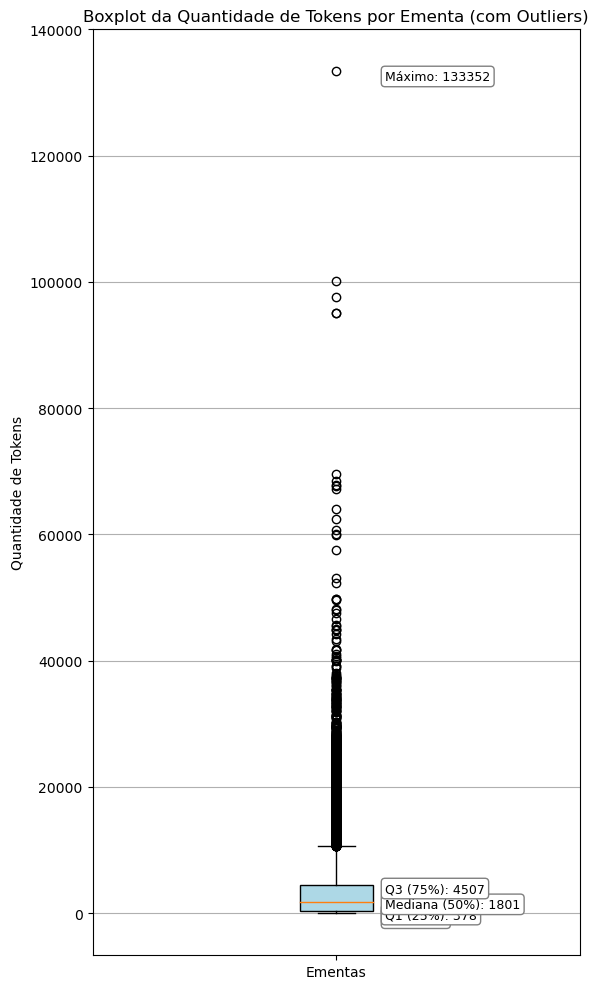

In [31]:
# Plot vertical com todos os outliers
plt.figure(figsize=(6, 10))
plt.boxplot(df['qtd_tokens_ementa'], vert=True, patch_artist=True,
            boxprops=dict(facecolor='lightblue'))

# Anotações
valores = [min_val, q1, q2, q3, max_val]
labels = ["Mínimo", "Q1 (25%)", "Mediana (50%)", "Q3 (75%)", "Máximo"]
deslocamentos = [-800, -600, -400, -600, -800]  # deslocamento vertical das labels

for val, label, offset in zip(valores, labels, deslocamentos):
    plt.text(1.1, val + offset, f'{label}: {int(val)}',
             ha='left', va='center', fontsize=9,
             bbox=dict(facecolor='white', edgecolor='gray', boxstyle='round,pad=0.3'))

# Título e eixos
plt.title('Boxplot da Quantidade de Tokens por Ementa (com Outliers)')
plt.ylabel('Quantidade de Tokens')
plt.xticks([1], ['Ementas'])
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

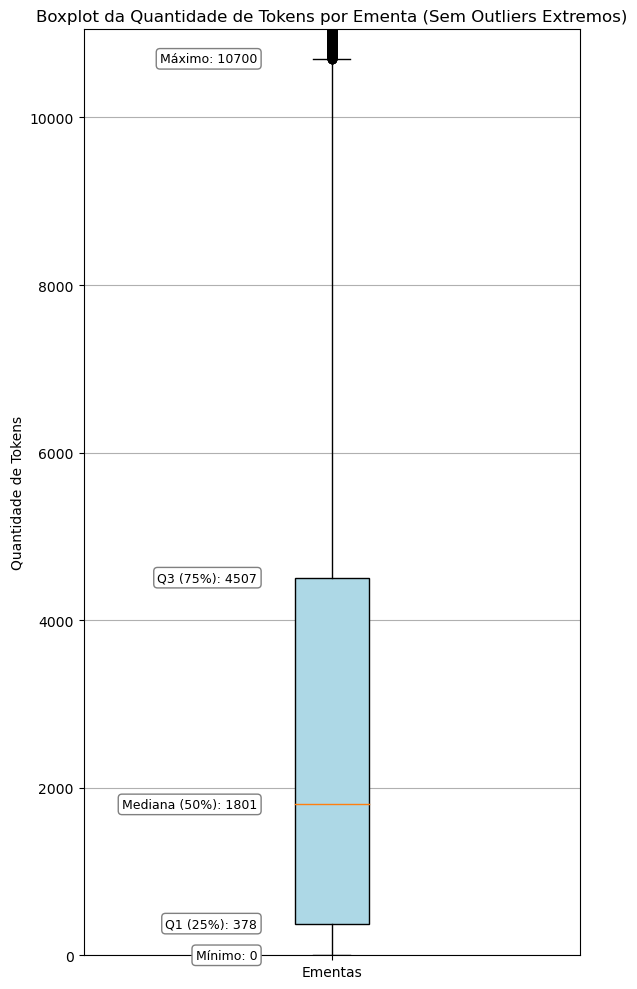

In [32]:
# Estatísticas principais
q1 = np.percentile(df['qtd_tokens_ementa'], 25)
q2 = np.percentile(df['qtd_tokens_ementa'], 50)
q3 = np.percentile(df['qtd_tokens_ementa'], 75)
iqr = q3 - q1
min_val = df['qtd_tokens_ementa'][df['qtd_tokens_ementa'] >= (q1 - 1.5 * iqr)].min()
max_val = df['qtd_tokens_ementa'][df['qtd_tokens_ementa'] <= (q3 + 1.5 * iqr)].max()

# Limite visual superior: 95º percentil
y_lim_max = np.percentile(df['qtd_tokens_ementa'], 95)

# Plot
plt.figure(figsize=(6, 10))
plt.boxplot(df['qtd_tokens_ementa'], vert=True, patch_artist=True,
            boxprops=dict(facecolor='lightblue'))

# Ajusta o eixo Y para focar nos dados centrais
plt.ylim(0, y_lim_max)

# Anotações posicionadas ao lado da caixa
valores = [min_val, q1, q2, q3, max_val]
labels = ["Mínimo", "Q1 (25%)", "Mediana (50%)", "Q3 (75%)", "Máximo"]
x_pos = 0.85

for val, label in zip(valores, labels):
    if val <= y_lim_max:
        plt.text(x_pos, val, f'{label}: {int(val)}',
                 ha='right', va='center', fontsize=9,
                 bbox=dict(facecolor='white', edgecolor='gray', boxstyle='round,pad=0.3'))

plt.title('Boxplot da Quantidade de Tokens por Ementa (Sem Outliers Extremos)')
plt.ylabel('Quantidade de Tokens')
plt.xticks([1], ['Ementas'])
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

In [38]:
import pandas as pd
import numpy as np

# Calcular o máximo real observado
max_val = df['qtd_tokens_ementa'].max()

# Definir faixas conforme matriz
intervalos = [
    ("0 a 378", 0, 378),
    ("379 a 1801", 379, 1801),
    ("1802 a 4507", 1802, 4507),
    ("4508 a 10700", 4508, 10700),
    (f"10701 a {max_val}", 10701, max_val)
]

# Contar registros por faixa
tabela = []
total_processos = df.shape[0]

for nome, ini, fim in intervalos:
    qtd = df[(df['qtd_tokens_ementa'] >= ini) & (df['qtd_tokens_ementa'] <= fim)].shape[0]
    tabela.append({
        "Faixa": nome,
        "qtd_inicial_tokens": int(ini),
        "qtd_final_tokens": int(fim),
        "qtd_processos": qtd
    })

# Percentual de processos entre 100 e 20000 tokens
filtro_100_20000 = df[(df['qtd_tokens_ementa'] >= 100) & (df['qtd_tokens_ementa'] <= 20000)]
percentual_100_20000 = (filtro_100_20000.shape[0] / total_processos) * 100

# Exibir tabela e percentuais
tabela_df = pd.DataFrame(tabela)
print("\n📊 Distribuição por Faixa de Tokens:\n")
print(tabela_df.to_string(index=False))

print(f"\n🔹 Percentual de processos com 100 a 20000 tokens: {percentual_100_20000:.2f}%")



📊 Distribuição por Faixa de Tokens:

       Faixa  qtd_inicial_tokens  qtd_final_tokens  qtd_processos
     0 a 378                   0               378            200
  379 a 1801                 379              1801              0
 1802 a 4507                1802              4507              0
4508 a 10700                4508             10700              0
  10701 a 99               10701                99              0

🔹 Percentual de processos com 100 a 20000 tokens: 0.00%


In [10]:
!pip install ace_tools

In [5]:
tabela_df

,indicador,qtd_inicial_tokens,qtd_final_tokens,qtd_processos
0,Mínimo até Q1,0,378,14261
1,Q1 (25%) até mediana,378,1801,14273
2,Mediana (50%) até Q3,1801,4507,14270
3,Q3 (75%) até máximo normal,4507,10700,11213
4,Máximo normal até o limite,10700,133352,3057


In [22]:


print(f" Percentual de processos até Q3 (~{int(q3)} tokens): {percentual_q3:.2f}%")
print(f" Percentual de processos até máximo normal (~{int(limite_sup)} tokens): {percentual_maximo:.2f}%")

 Percentual de processos até Q3 (~7017 tokens): 74.97%
 Percentual de processos até máximo normal (~16489 tokens): 96.65%


In [35]:
conn = get_connection()
df = pd.read_sql_query("SELECT ementa_completa, qtd_tokens_ementa FROM processos WHERE qtd_tokens_ementa < 100 limit 200", conn)
conn.close()

# Configura display do pandas para não truncar texto
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.expand_frame_repr', False)
df

C:\Users\Loreane\AppData\Local\Temp\ipykernel_19216\2145258360.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query("SELECT ementa_completa, qtd_tokens_ementa FROM processos WHERE qtd_tokens_ementa < 100 limit 200", conn)


,ementa_completa,qtd_tokens_ementa
0,EmentaObservaçõesAcórdão,9
1,"EmentaBENEFÍCIOS DA JUSTIÇA GRATUITA. PESSOA JURÍDICA.Em que pese a possibilidade de concessão do benefício da justiça gratuita para a pessoa jurídica, por configurar medida excepcional, é necessária a efetiva comprovação da condição financeira precária, nos termos da Súmula nº 463 do TST, o que não ocorreu no caso concreto. Agravo de instrumento não conhecido, por deserto.",99
2,"EmentaVÍNCULO EMPREGATÍCIO.NÃO CONFIGURAÇÃO. Ausentes os elementos tipificadores do vínculo empregatício, previstos no artigo3ºdaCLT, não há como se reconhecer a existência do contrato de emprego perseguido nos autos. Recurso Ordinário a que se nega provimento.ObservaçõesAcórdão",78
3,"EmentaBENEFICIÁRIO DA JUSTIÇA GRATUITA.ISENÇÃO DAS CUSTAS PROCESSUAIS. DEVIDA.O beneficiário da justiça gratuita é isento do pagamento das custas processuais (art.790-A, caput, daCLT).",79
4,"EmentaRecurso da reclamada a que se nega provimento, porquanto há nos autos prova do vínculo empregatício alegado e da remuneração auferida pelo reclamante como motoboy, na qual não estão incluídas as indenizações pela locação do veículo, combustível gasto e refeição.",63
5,"EmentaRELATÓRIO Trata-se de recurso ordinário em procedimento sumaríssimo, interposto nos autos da reclamação trabalhista ajuizada por JOSÉ MARTINIANO DE FREITAS JÚNIOR em face do INSTITUTO DE PSICOLOGIA CLINICA EDUCACIONAL E PROFISSIONAL.",90
6,EmentaObservaçõesAcórdão,9
7,"EmentaSUBSTITUIÇÃO.PERÍODO DAS FÉRIAS.SALÁRIO DO SUBSTITUÍDO. DEFERIMENTO. Provada a substituição durante o período de férias, é devido o pagamento do salário do empregado substituído (Súmula159do TST).",76
8,"EmentaE M E N T A Dispensada, nos termos da lei.",17
9,EmentaObservaçõesAcórdão,9
